# COGS 118A - Project Checkpoint

# Names

- Xiaotong Zeng
- Yandong Xiang
- Xiang Li
- Jiaxin Ye

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

- The goal of this project is to predict whether a transaction is fraudulent given identity and transaction information. The data that we are using contains two files: identity and transaction, which are joined by the “TransactionID” variable. But not all transactions have corresponding identifiers. The variables in the identity dataset are network connection information and digital signature associated with transactions, which are provided by Vesta’s fraud protection system and digital security partners. The variables in the transaction dataset are transaction amounts, card information, product of each transaction, and other related information. We will first apply data cleaning, and then data engineering to One-Hot-Encode categorical variables, standardize numerical variables, and perform the PCA for newly engineered variables. Then, we will use Naive Bayes as our baseline model, and we will compare it with the performances of RandomForest, LightGBM, and XGBoost to determine which model we will eventually use for this prediction task. In terms of evaluating the performance of our model, we will be using recall scores primarily since false negatives are more costly in fraud detection. We do not want to predict a transaction as normal when it is actually fraudulent. But we will also take precision, accuracy, and F1 score into consideration for the balance of our model predictions.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

Nowadays, electronic payments have become an indispensable part of people’s everyday lives. It is an ongoing trend that digital wallets have replaced physical wallets. But as this trend evolves, many unscrupulous people see the opportunity of making illegal profits out of it, i.e. through transaction fraud. Online transaction fraud occurs when a fraudster attempts to conduct a transaction using another person’s identity and payment information<a name="Sasso"></a>[<sup>[1]</sup>](#Sasso). According to the Federal Trade Commission (FTC), there was a total of 5.8 billion dollars of loss through fraud in 2021 for a 70 percent year-over-year increase<a name="Skiba"></a>[<sup>[2]</sup>](#Skiba). In addition to ostensible monetary losses on the consumers’ sides, the fraud also induces negative impacts on customer/reputational, operational and topline revenue implications on the merchants’ sides<a name="McKee"></a>[<sup>[3]</sup>](#McKee). If the merchants impose a restrictive fraud control policy, this can diminish the consumer experience. It is also time-consuming and labor-intensive for merchants to maintain anti-fraud technology. In terms of topline revenue, merchants may tend to avoid new revenue opportunities, such as entering a foreign market, due to concerns over fraud. Thus, it is of great importance to develop fraud detection algorithms to protect both consumers and merchants, and to provide a safe e-payment environment in general. In particular, machine learning techniques are widely used in fraud detection nowadays, and it is far more accurate than the traditional manual process. In the late 20th century, the companies spotted frauds through simple rules. For example, if a transaction exceeds 10,000 dollars, then there was a high risk of fraud. However, this was a static method since it could not keep up with the changing customer behavior promptly. That is, it was not effective in terms of adjusting to new fraud patterns. So, machine learning models are a better choice since it allows automation and self-adaptiveness. They learn which transactions are normal and which are anomalous<a name="Oakley"></a>[<sup>[4]</sup>](#Oakley). However, a problem that we would encounter is the issue of imbalanced data. In the real world, most transactions are valid and only a small portion are fraud transactions<a name="Pykes"></a>[<sup>[5]</sup>](#Pykes). Thus, we need to take this into account when we deal with our dataset.

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

The problem is to predict whether a transaction is fraudulent using features such as card, address, email, device information, etc. Fraudulence is a big issue since it harms both customers and merchants, and the society in general. Historical methods of detecting fraud transactions were based on simple rules that may not be able to catch the complicated patterns in the data. The objective of this project is to predict if a transaction is fraudulent (label 1 means fraudulent, and label 0 means normal) through experimenting with different machine learning models and selecting the one with the highest recall score.

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

identity.csv
- https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_identity.csv
- (41 variables, 144233 observations)
- Consists of: DeviceType, DeviceInfo, id_01 - id_38, TransactionID
    - DeviceType: type of device used, such as mobile and desktop, etc
    - DeviceInfo: The system used by the device
    - Transaction ID: id for the transaction made
    - id_01 - id_38: network connection and digital signature information
- Critical variables: id_12 - id_38(float), Device type(‘string’),  Device Info(‘string’)
- Convert device type to is mobile: if is mobile, True, else False
- Onehot encode Device Info, Their are 1786 unique device software. Keep the software in the top 20 ocurrances of the dataset and set rest of them as “Others” [to 21 columns].


transaction.csv
- https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_transaction.csv
- (394 variables, 590540 observations)
- Consists of: ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1-M9, C1-C14, D1-D15, V1 - V339, TransactionDT, TransactionAmt, dist1 - dist2
    - isFraud: the label of dataset
    - ProductCD: The code of the Product 
    - TransactionAmt: Transaction amount
    - TransactionDT: Transaction datetime
    - P_emaildomain: purchaser email domain
    - R_emaildomain: recipient email domain
    - card1 - card6: payment card information
    - addr1: billing region
    - addr2: billing country
    - dist1 - dist2: distance between different address
    - M1-M9: matches between info provided
    - C1-C14: count of address associated with the card
    - D1-D15: days between previous transactions
    - V1 - V339: Vesta engineered rich features
- Critical variables: card1 - card6(Int), addr1(float), addr2(float), M1-M9(boolean), C1-C14(float), D1-D15(float), V1 - V339(float), TransactionDT, TransactionAmt, dist1 - dist2, ProductCD(string), P_emaildomain(string), R_emaildomain(string), TransactionAmt(float)
- Convert ProductCD to is W: if is W, True, else False.
- Onehot encode P_emaildomain[to 59 columns] and R_emaildomain[to 60 columns].


Data Merging:
- Merging on the TransactionID column of the identity.csv and the TransactionID column of the transaction.csv


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

To predict whether a transaction is fraudulent or not, we will train and compare several supervised machine learning classifiers using the information about the transactions and the user identities. The first step is to join the transaction table and identity table by transaction id. We will clean up the dataset by removing or imputing the missing or invalid data. Next, we will perform feature engineering by implementing one-hot encoding for the categorical features, standardization for the numerical features, and principal component analysis for all the newly engineered features. Afterwards, we will select the top features and train different classifiers on the feature data. For model selections, we will try Naive Bayes, RandomForest, LightGBM, and XGBoost as they are more suitable for classification tasks and can be trained on large datasets with high-dimensional feature spaces. For performance evaluation, we will split the data into training and testing sets, and use metrics such as accuracy, precision, recall, and F1 score to measure the performance of the classifier on the testing set. We will also use cross-validation to prevent overfitting and use grid search to tune the hyperparameters of the classifier. 
In terms of implementation, we will use scikit-learn, lightGBM, and XGBoost libraries/packages and their functions to preprocess the data and construct the models. For our benchmark model, we plan to use a Naive Bayes classifier and compare the performance of the other models (RandomForest, LightGBM, and XGBoost) against it.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

For each observation in the test set, we will predict whether or not the transaction is fraud. To evaluate our model performance, we will be mainly using Confusion Matrix to assess our predictions. In the case of fraud detection, the cost of False Negatives is much higher than the cost of False Positives. To put it into context, we would rather predict transactions that are not fraudulent as fraudulent than predict some transactions that are fraudulent as not fraudulent. Therefore, we need to focus on getting higher recall. Meanwhile, we will also control for the balance of our model predictions by looking at accuracy, precision, and F1 score.

- Recall = True Positive / (True Positive + False Negative)
- Precision = True Positive / (True Positive + False Positive)
- F1 = (2 * precision * recall) / (precision + recall)
- Accuracy = (True Positive + True Negative) / (True Positive + False Negative + True Negative + False Positive)



# Preliminary results

- **Exploratory Data Analysis** 
We converted the transaction timestamp columns into categorized variables including month of the year, day of the week, hour of the day and discovered a strong cycle pattern and difference exists between the fraud transactions and non-fraud transactions over time. There seems to be a higher percent of fraudulent transactions happening at night than during the day. There seems to be a higher percentage of fraudulent transactions happening at weekends than during the weekdays.

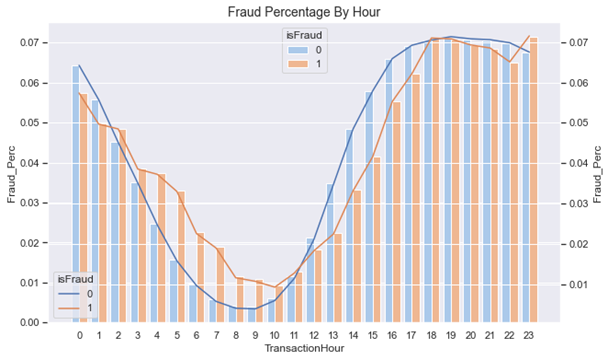

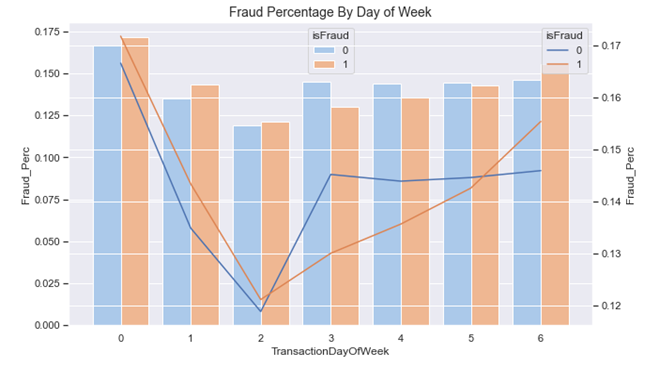

We analyzed the ratio between fraud and non-fraud transactions in each category of transaction amount and found that fraud transactions tend to happen more often in either super large amounts or small amounts.

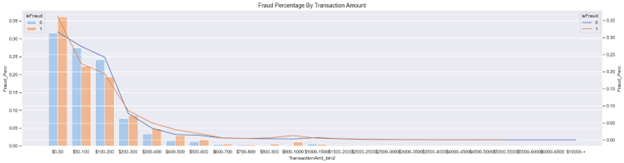

We looked at the email domain and found that transactions that are associated with certain email domains such as protonmail.com and mail.com are more likely to be fraudulent.

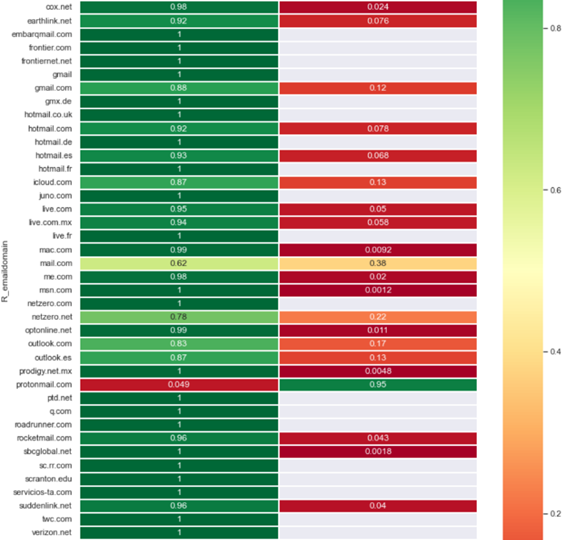

- **Feature Engineering and Selection**

*Drop rows with more than 90% values missing*

Because we have a large dataset and some columns contain primarily missing values, we decide to abandon these columns because they have little influence on our model results.

*Time*

As we convert the transaction timestamp into hour, day, month, we are able to analyze their probability of being fraudulent and categorize the time period  into different fraudulent levels. We decide to add three features about the time which is Fraud Level (high, mid, low, very low); Minutes away from noon; Whether the time is before noon or after noon (indicated with +- sign).

*Transaction Amount*

For transaction amount, we decide to remove the outliers data from the dataset which include the observations with transaction amount greater than 30000. We also discovered that the cent amount of the transaction could also be an indicator for whether or not the transaction is fraudulent, so we decided to add the cent values as another feature.

*Email Domain & Address*

For personal information related to the identity such as email domains and addresses associated with the transaction, we first cleaned up the information and selected top emails and addresses that have a strong correlation with whether or not the transaction is fraudulent and one hot encoded the columns.

- **Performance of the baseline model**

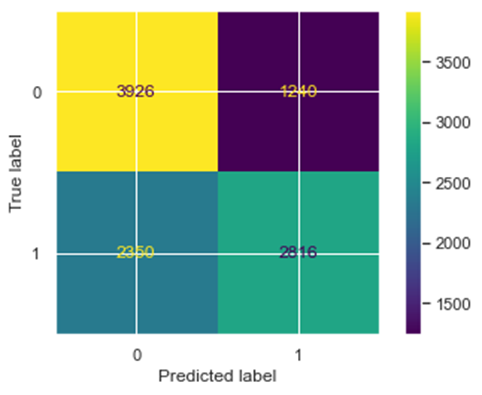

For the baseline model, we implemented Bernoulli naive bayes classifier because we have a binary classification task. The model reaches an accuracy of 0.653, a precision of 0.694, a recall of 0.545, and a f1-score of 0.611. The overall performance of the classifier is not significantly strong but is better than random predictions. During the next step, we would focus on trying different classifiers and designing more useful features to try to exceed the baseline model’s performance, especially on getting a higher recall in our situation.

- **ROC Curve**

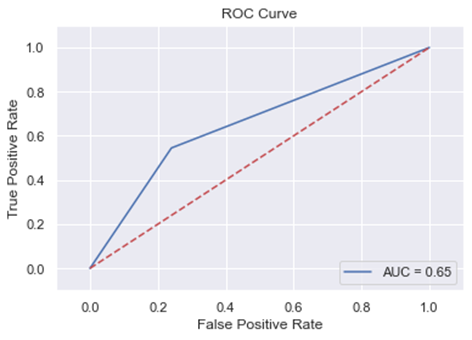

The ROC Curve indicated our baseline model’s performance at all classification thresholds and the graph showed that the model’s prediction is slightly better than random prediction and can be used as a solid baseline comparison for future models.

- **Model Performance Tables**

For this checkpoint, we have only tried Naive Bayes and would be testing more classifiers in the next few days.

| Model Name | Accuracy| Precision | Recall | F1-Score |
|---|---|---|---|---|
| Naive Bayes | 0.653 | 0.694 | 0.545 | 0.611 |
| Random Forest | --- | --- | --- | --- |
| LightGBM | --- | --- | --- | --- |
| XGBoost | --- | --- | --- | --- |

# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org
First of all, since this is a public dataset found on Kaggle, it’s likely that it is rather safe regarding ethics and data privacy concerns. Upon examining the dataset, although we have transaction id, there’s no way we could trace it back to find personally identifiable information. Moreover, although we have payment card information, we don’t have card number, but only card type, card category, issue bank, and country, which also isn’t enough to extract personally identifiable information. For the identity part of this dataset, it’s unlikely that there could be ethical or privacy concerns because we don’t actually know what the fields stand for, as they are simply called id2, id3, etc. According to the descriptions, The field names are masked and pairwise dictionaries will not be provided for privacy protection and contract agreement. However, this dataset could be somewhat biased because according to its description, the data is collected by Vesta’s fraud protection system and digital security partners, which is only one or several companies. Thus, this dataset is not guaranteed to be an accurate representation of all transactions that are fraud or not. It is also unlikely that our results could be used unethically because our task tries to identify and prevent frauds, without violating data privacy and without proposing individuals to engage in these illegal activities. 

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...
* *We shall all be able to reach each other through group/private messages that everyone shall check their messages at least every morning & night.*
* *We shall all be responsible for finishing our assigned tasks before the deadline*
* *We shall ask other group members or TAs for help when stuck on something for too long.*
* *Upon finishing or making progress on assigned tasks, we shall notify other group members through group messages.*
* *When we disagree with each other, we shall all communicate politely and respectfully, and we shall not take disagreements personally.*
* *We shall learn together by doing this project together.*


# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/25  |  6 PM |  Edit, finalize, and submit proposal | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part | 
| 2/28  | 6 PM  | Import & Wrangle Data , merge datasets, do some EDA (Xiaotong) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/8  | 6 PM  | Finalize wrangling/EDA; Begin programming for project (Yandong, Xiang), feature engineering | PCA and model construction |
| 3/12  | 6 PM  | Finalize model selections (Xiaotong, Yandong, Xiang, Jiaxin) | Compare model results and start drafting analysis |
| 3/15  | 6 PM  | Complete analysis; Draft results/conclusion/discussion (Jiaxin)| Discuss/edit full project |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="Sasso"></a>1.[^](#Sasso): Sasso, T. (14 Feb 2023) What is Online Transaction Fraud? *Funraise.* https://help.funraise.io/en/articles/3944864-what-is-online-transaction-fraud#:~:text=What%20is%20Transaction%20Fraud%3F%20Transaction%20fraud%20is%20a,a%20transaction%20in%20their%20name%E2%80%94like%20stolen%20credit%20cards. <br> 
<a name="Skiba"></a>2.[^](#Skiba): Skiba, K. (22 Feb 2022) Consumer Fraud Losses Hit Record $5.8 Billion. *AARP.* https://www.aarp.org/money/scams-fraud/info-2022/ftc-fraud-report-new.html <br>
<a name="McKee"></a>3.[^](#McKee): McKee, J. (22 Nov 2022) Unpacking The Overall Impact of Fraud. *Forbes.* https://www.forbes.com/sites/jordanmckee/2020/11/22/unpacking-the-overall-impact-of-fraud/?sh=560a75917891 <br>
<a name="Oakley"></a>4.[^](#Oakley): Oakley, C. (30 March 2022) The role of machine learning in fraud detection. *Featurespace.* https://www.featurespace.com/newsroom/the-role-of-machine-learning-in-fraud-detection/<br> 
<a name="Pykes"></a>5.[^](#Pykes): Pykes, K. (21 Sep 2020) Using Machine Learning To Detect Fraud. *Towards Data Science.* https://towardsdatascience.com/using-machine-learning-to-detect-fraud-f204910389cf <br>
